In [1419]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1420]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin
import os
import geojson
import pandas as pd
import shutil

In [1421]:
from dotenv import load_dotenv

load_dotenv()

True

# GENERATE RANDOM IMAGE 1

In [1422]:
# Set a specific random seed for reproducibility
np.random.seed(42)

# Image dimensions
width = 4
height = 4
num_bands = 8

# Georeferencing information (coordinates for Verges)
left = 3.0466    # Left coordinate
top = 42.0533   # Top coordinate
pixel_size = 0.0001  # Pixel size

# Output file path
# Get the current directory of the script
current_directory = os.getcwd()
if not os.path.exists(os.path.join(current_directory, "data")):
    os.mkdir(os.path.join(current_directory, "data"))   
# Combine the current directory with the relative path to the "data" directory
data_directory = os.path.join(current_directory, "data")
simulated_image_name = "S2L2A_2019-06-02.tif"
output_filename = os.path.join(data_directory, simulated_image_name)

# Generate random data for the image
random_data = np.random.randint(0, 255, size=(num_bands, height, width), dtype=np.int16)

transform = from_origin(left, top, pixel_size, pixel_size)

with rasterio.open(output_filename, 'w', driver='GTiff', height=height, width=width, count=num_bands,
                   dtype=random_data.dtype, crs='+proj=latlong', transform=transform) as dst:
    for i in range(num_bands):
        dst.write(random_data[i], i + 1)

# Create a mask of type .geojson to mask simulated image
def aoi_mask():
    return {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "properties": {},
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [
                        [
                            [3.0439, 42.076056],
                            [3.017464, 42.052607],
                            [3.0439, 42.032209],
                            [3.079262, 42.055156],
                            [3.0439, 42.076056],
                        ]
                    ],
                },
            }
        ],
    }

aoi_mask = aoi_mask()

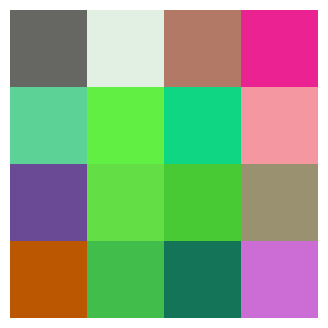

In [1423]:
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(random_data[0:3, :, :].transpose(1, 2, 0))
plt.axis('off')
plt.show()

# GENERATE RANDOM IMAGE 2

In [1424]:
# Set a specific random seed for reproducibility
np.random.seed(42)

# Output file path
# Get the current directory of the script
current_directory = os.getcwd()
# Combine the current directory with the relative path to the "data" directory
data_directory = os.path.join(current_directory, "data")
simulated_image_name_2 = "S2L2A_2019-05-23.tif"
output_filename = os.path.join(data_directory, simulated_image_name_2)

# Generate random data for the image
random_data_2 = np.random.randint(0, 255, size=(num_bands, height, width), dtype=np.int16)

transform = from_origin(left, top, pixel_size, pixel_size)

with rasterio.open(output_filename, 'w', driver='GTiff', height=height, width=width, count=num_bands,
                   dtype=random_data_2.dtype, crs='+proj=latlong', transform=transform) as dst:
    for i in range(num_bands):
        dst.write(random_data_2[i], i + 1)

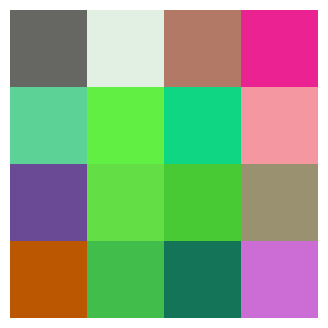

In [1425]:
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(random_data_2[0:3, :, :].transpose(1, 2, 0))
plt.axis('off')
plt.show()

# GENERATE RANDOM IMAGE 2

In [1426]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/judith/Desktop/spai_new/spai')
from spai.storage.Storage import Storage

storage = Storage('data')
image = storage.read(simulated_image_name)
date=simulated_image_name.split('.')[0].split('_')[-1]
date

'2019-06-02'

In [1427]:
from spai.analytics import water_quality

water_quality(simulated_image_name, aoi_mask, storage)

# NDWI

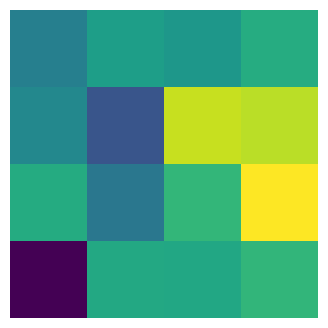

In [1428]:
ndwi = storage.read(f'ndwi_{date}.tif')
plt.figure(figsize=(4, 4))  
plt.imshow(ndwi.read(1))
plt.axis('off')
plt.show()

In [1429]:
ndwi.read().shape

(1, 4, 4)

In [1430]:
ndwi.read()

array([[[-0.25842697, -0.0464135 , -0.09649123,  0.05797101],
        [-0.20316623, -0.54054054,  0.55688623,  0.52380952],
        [ 0.04561404, -0.32019704,  0.13043478,  0.6969697 ],
        [-0.98809524,  0.02702703,  0.02352941,  0.12169312]]])

In [1431]:
ndwi.read().max(), ndwi.read().min()

(0.6969696969168961, -0.9880952380364229)

# NDTI

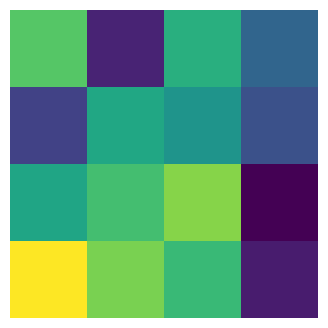

In [1432]:
ndti = storage.read(f'ndti_{date}.tif')
plt.figure(figsize=(4, 4))  
plt.imshow(ndti.read(1))
plt.axis('off')
plt.show()

In [1433]:
ndti.read().shape

(1, 4, 4)

In [1434]:
ndti.read()

array([[[ 0.40718563, -0.79365079,  0.20769231, -0.36448598],
        [-0.60638298,  0.14465409, -0.003861  , -0.51658768],
        [ 0.12352941,  0.33971292,  0.56485356, -0.98230088],
        [ 0.9047619 ,  0.52351097,  0.29554656, -0.83549784]]])

In [1435]:
ndti.read().max(), ndti.read().min()

(0.9047619043310657, -0.9823008848688229)

# NDCI

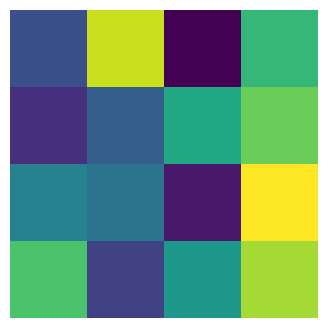

In [1436]:
ndci = storage.read(f'ndci_{date}.tif')
plt.figure(figsize=(4, 4))  
plt.imshow(ndci.read(1))
plt.axis('off')
plt.show()

In [1437]:
ndci.read(1).shape

(4, 4)

In [1438]:
ndci.read(1)

array([[0.29302481, 0.92488496, 0.0625    , 0.6875    ],
       [0.1875    , 0.34704986, 0.625     , 0.78926622],
       [0.4773443 , 0.42444013, 0.125     , 1.        ],
       [0.73601327, 0.24329087, 0.5625    , 0.875     ]])

In [1439]:
ndci.read(1).max(), ndci.read(1).min()

(1.0, 0.0625)

# NDTI CATEGORIZED

In [1440]:
ndti_categorized = storage.read(f'ndti_categorized_{date}.tif')
ndti_categorized.read().shape

(1, 4, 4)

In [1441]:
ndti_categorized.read()

array([[[4, 4, 4, 1],
        [4, 4, 2, 1],
        [4, 2, 3, 1],
        [4, 3, 2, 1]]])

In [1442]:
np.unique(ndti_categorized.read())

array([1, 2, 3, 4])

In [1443]:
np.count_nonzero(ndti_categorized.read()==3)

2

# NDCI CATEGORIZED

In [1444]:
ndci_categorized = storage.read(f'ndci_categorized_{date}.tif')
ndci_categorized.read().shape

(1, 4, 4)

In [1445]:
ndci_categorized.read()

array([[[4, 4, 4, 3],
        [4, 4, 3, 3],
        [4, 2, 2, 3],
        [4, 2, 3, 3]]])

In [1446]:
np.unique(ndci_categorized.read())

array([2, 3, 4])

In [1447]:
np.count_nonzero(ndci_categorized.read()==2)

3

# DOC categorized

In [1448]:
doc_categorized = storage.read(f'doc_categorized_{date}.tif')
doc_categorized.read().shape

(1, 4, 4)

In [1449]:
doc_categorized.read()

array([[[5, 5, 5, 1],
        [5, 5, 1, 1],
        [5, 1, 1, 1],
        [5, 1, 1, 1]]])

In [1450]:
np.unique(doc_categorized.read())

array([1, 5])

In [1451]:
np.count_nonzero(doc_categorized.read()==1)

9

# NDTI RGB

In [1452]:
ndti_categorized_rgb = storage.read(f'ndti_categorized_rgb_{date}.tif')
ndti_categorized_rgb.read().shape

(4, 4, 4)

In [1453]:
ndti_categorized_rgb.read()

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.50196078, 0.        , 1.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [1.        , 1.        , 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [1.        , 1.        , 0.        , 1.        ],
        [1.        , 0.        , 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [1.        , 0.        , 0.        , 1.        ],
        [1.        , 1.        , 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ]]])

In [1454]:
np.unique(ndti_categorized_rgb.read())

array([0.        , 0.50196078, 1.        ])

In [1455]:
np.count_nonzero(ndti_categorized_rgb.read()==0)

43

In [1456]:
np.count_nonzero(ndti_categorized_rgb.read()==0.5019607843137255)

4

In [1457]:
np.count_nonzero(ndti_categorized_rgb.read()==1)

17

# NDCI RGB

In [1458]:
ndci_categorized_rgb = storage.read(f'ndci_categorized_rgb_{date}.tif')
ndci_categorized_rgb.read().shape

(4, 4, 4)

In [1459]:
ndci_categorized_rgb.read()

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 0., 1.]],

       [[0., 0., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 0., 0., 1.]],

       [[0., 0., 0., 0.],
        [1., 1., 0., 1.],
        [1., 0., 0., 1.],
        [1., 0., 0., 1.]]])

In [1460]:
np.unique(ndci_categorized_rgb.read())

array([0., 1.])

In [1461]:
np.count_nonzero(ndci_categorized_rgb.read()==0)

43

In [1462]:
np.count_nonzero(ndci_categorized_rgb.read()==1)

21

# DOC RGB

In [1463]:
doc_categorized_rgb = storage.read(f'doc_categorized_rgb_{date}.tif')
doc_categorized_rgb.read().shape

(4, 4, 4)

In [1464]:
doc_categorized_rgb.read()

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.50196078, 0.        , 1.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.50196078, 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.50196078, 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.50196078, 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ]]])

In [1465]:
np.unique(doc_categorized_rgb.read())

array([0.        , 0.50196078, 1.        ])

In [1466]:
np.count_nonzero(doc_categorized_rgb.read()==0)

46

In [1467]:
np.count_nonzero(doc_categorized_rgb.read()==0.5019607843137255)

9

In [1468]:
np.count_nonzero(doc_categorized_rgb.read()==1)

9

# Median Water Mask

In [1469]:
median_water_mask = storage.read(f'median_water_mask_{date}.tif')
median_water_mask.read().shape

(2, 4, 4)

In [1470]:
median_water_mask.read()

array([[[0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [0, 1, 1, 1]],

       [[0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [0, 1, 1, 1]]], dtype=uint8)

# Table Trubidity Ha

In [1471]:
table_turbidity_ha = pd.read_json('data/table_chlorophyll_Ha.json')
table_turbidity_ha

,Good [Has],Careful [Has],Bad [Has],Total [Has]
2019-06-02,0,0.03,0.06,0.09


In [1472]:
table_turbidity_ha["Good [Has]"].values[0]

0

In [1473]:
table_turbidity_ha["Careful [Has]"].values[0]

0.03

In [1474]:
table_turbidity_ha["Bad [Has]"].values[0]

0.06

# Table Turbidity %

In [1475]:
table_turbidity_percent = pd.read_json('data/table_turbidity_percent.json')
table_turbidity_percent

,Good [%],Careful [%],Bad [%]
2019-06-02,44.444444,33.333333,22.222222


# Table Chlorophyll Ha

In [1476]:
table_chloro_ha = pd.read_json('data/table_chlorophyll_Ha.json')
table_chloro_ha

,Good [Has],Careful [Has],Bad [Has],Total [Has]
2019-06-02,0,0.03,0.06,0.09


# Table Chlorophyll %

In [1477]:
table_chloro_percent = pd.read_json('data/table_chlorophyll_percent.json')
table_chloro_percent

,Good [%],Careful [%],Bad [%]
2019-06-02,0,33.333333,66.666667


# Table DOC Ha

In [1478]:
table_doc_ha = pd.read_json('data/table_doc_Ha.json')
table_doc_ha

,N0 [Has],N1 [Has],N2 [Has],N3 [Has],Total [Has]
2019-06-02,0.09,0,0,0,0.09


# Table DOC Percent

In [1479]:
table_doc_percent = pd.read_json('data/table_doc_percent.json')
table_doc_percent

,N0 [%],N1 [%],N2 [%],N3 [%]
2019-06-02,100,0,0,0


# Table Water Extent

In [1480]:
table_water_extent = pd.read_json('data/table_water_extent.json')
table_water_extent

,Water [Has],Not Water [Has],Total [Has],Percentage [%]
2019-06-02,0.09,0,0.09,100


In [1481]:
shutil.rmtree(data_directory) 